<a href="https://colab.research.google.com/github/prathicc/Pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Let's explore an example PyTorch end-to-end workflow.



In [17]:
import torch
from torch import nn #contains all of pytorch building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.3.0+cu121'

## 1. Data (preparing and loading)

Data can be almost anything.

* Excel spreadsheet
* Images of any kind
* Videos of any kind
* Audio
* DNA
* Text

Let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**


In [18]:
start = 0
end = 1
step = 0.02
torch.arange(start, end, step).unsqueeze(dim = 1).shape

torch.Size([50, 1])

In [19]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [20]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Three datasets:

* training set (course material)
* validation set (practice exam) - tune model patterns
* test set (final exam) - see if model is ready for the wild

In [21]:
# create a train-test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [22]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # plotting training data in blue
  plt.scatter(train_data, train_labels, c='b', s=6, label = "Training data")

  # plotting test data in green
  plt.scatter(test_data, test_labels, c='g', s=6, label = "Testing data")

  # Are there predicitons?
  if predictions is not None:
    # Plot the predictions if theu exist
    plt.scatter(test_data, predictions, c='r', s=6, label = "Predictions")

  # SHow the legends
  plt.legend(prop = {"size":14})



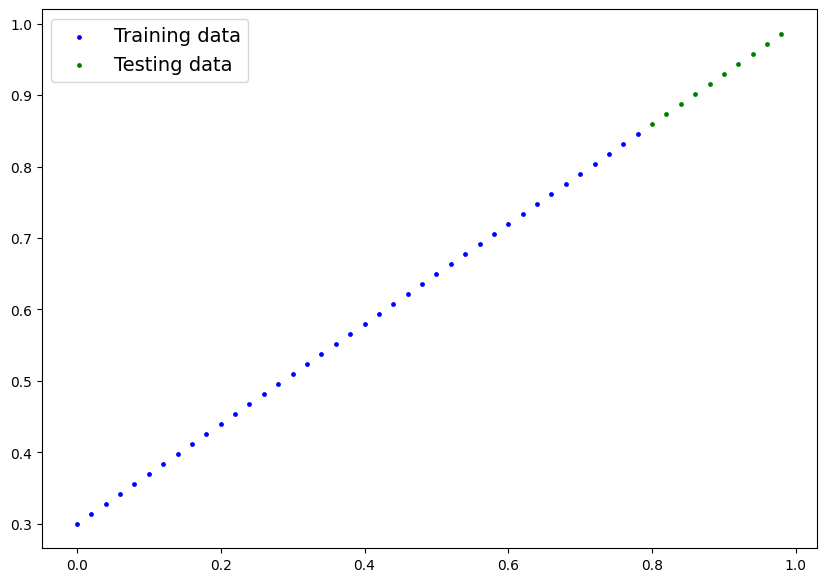

In [23]:
plot_predictions()

## 2. Build Model

In [24]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everythong in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  # forward method to define the computation in the model
  # any subclass of nn.Module needs to override forward()
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias


### Pytorch model building essentials

* `torch.nn` - contains all the building blocks for computational graphs (neural networks)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a Pytorch layer from torch.nn wil set these for us
* `torch.nn.Module` - the base class for all neural network modules
* `torch.optim` - where optimizers in pytorch live, help in gradient descent

### Checking the contents of our PyTorch model



In [25]:
# Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [27]:
weight, bias

(0.7, 0.3)

### Making prediciton using `torch.inference_mode()`

In [28]:
with torch.inference_mode(): # <- turns off gradient tracking
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

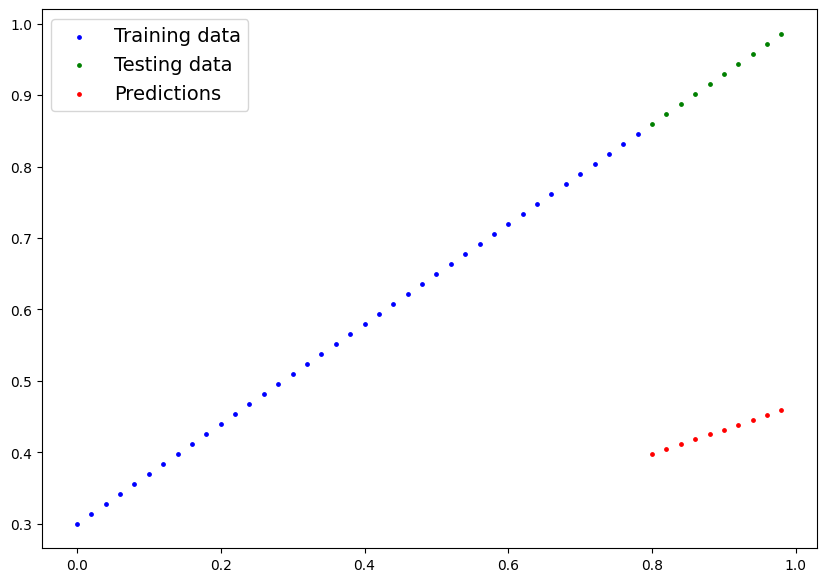

In [29]:
plot_predictions(predictions = y_preds)

## 3. Train Model

Move from unknown parameters to known parameters

From a poor representation of the data to a better representation of the data

Things we need to train:

* **Loss function:** Function to measure how wrong the model is performing
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (weights and bias)

For PyTorch, we need:
* training loop.
* testing loop.

In [30]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)



### Building a training (and testing) loop

A cuple of things we need in a training loop:
0. Loop through the data
1. Forward pass (data moving through our model's `forward()` functions)
2. Calculate the loss
3. Optimizer zerograd
4. Loss bacward
5. Optimizer step

In [31]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
epochs = 100 # Hyperparameter
torch.manual_seed(42)
### Training
#Loop through the data
for epoch in range(epochs):
  # Set the model to training mode (this is the default state of the model)
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Zero the gradients of the optimizer (they accumulate by default)
  optimizer.zero_grad()

  # 4. Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer(perform gradient descent)
  optimizer.step()

  # Testing
  model_0.eval() # turns off and other settings not needed for testing (dropout, batchnorm layers)

  with torch.inference_mode(): # turns off gradient tracking
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
plot_predictions(predictions = y_preds_new)

In [ ]:
weight, bias